In [1]:
%pip install opencv-python shapely

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


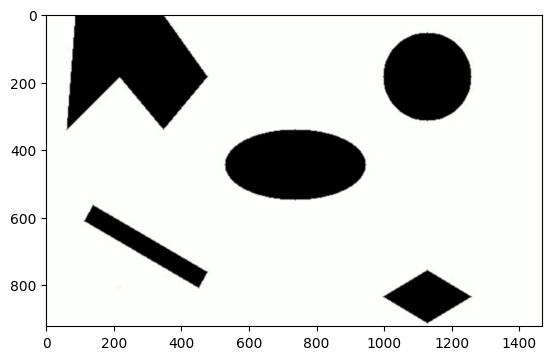

In [2]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./obstacle/o3.png"))

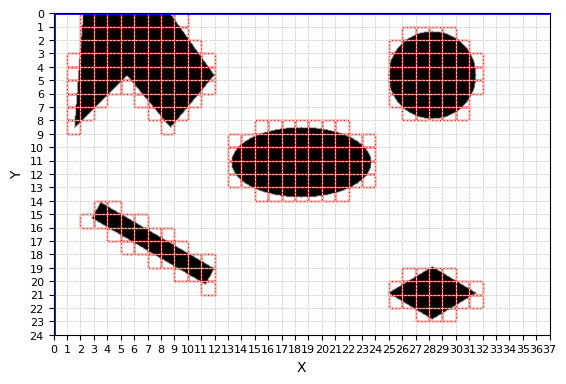

In [3]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from utils.explorer import Explorer
from utils.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path='./obstacle/o3.png', grid_size=40)
map.draw_coordinate_system()

In [4]:
initial=(0,0)
goal=(32,23)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 105
Elapsed Time: 0.004380941390991211 seconds
path length = 41


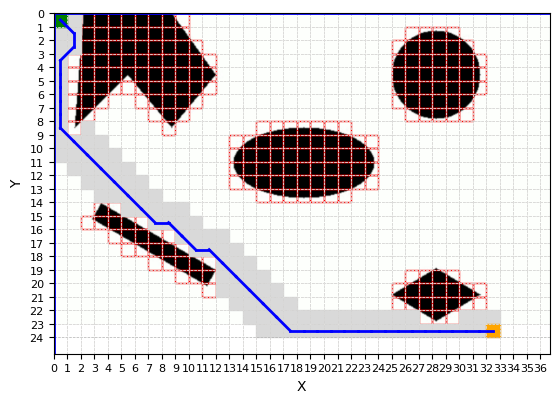

In [5]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.0054209232330322266 seconds
path length = 41


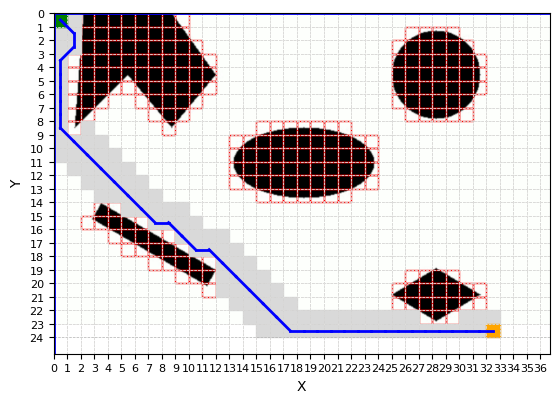

In [6]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [7]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

p1:  (20.0, 20.0)
(60.0, 380.0) is added
p1:  (20.0, 340.0)
(60.0, 380.0) is added
p1:  (60.0, 380.0)
(300.0, 620.0) is added
p1:  (260.0, 580.0)
(300.0, 620.0) is added
p1:  (300.0, 620.0)
(380.0, 660.0) is added
p1:  (340.0, 620.0)
(380.0, 660.0) is added
p1:  (380.0, 660.0)
(420.0, 700.0) is added
p1:  (420.0, 700.0)
(500.0, 740.0) is added
p1:  (460.0, 700.0)
(500.0, 740.0) is added
p1:  (500.0, 740.0)
(1180.0, 940.0) is added
p1:  (1140.0, 940.0)


In [8]:
simplified_path

[(0, 0),
 array([0, 8]),
 array([0, 8]),
 array([ 6, 14]),
 array([ 6, 14]),
 array([ 8, 15]),
 array([ 8, 15]),
 array([ 9, 16]),
 array([11, 17]),
 array([11, 17]),
 array([28, 23]),
 array([31, 23]),
 array([32, 23])]

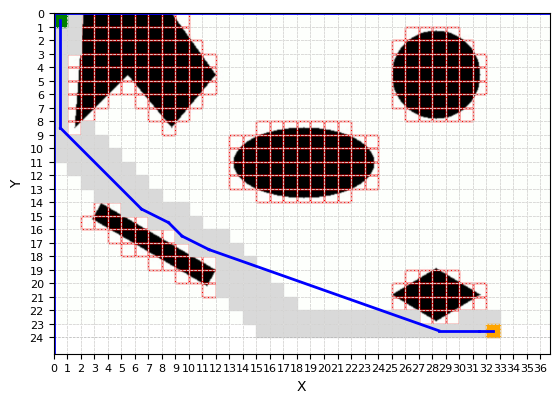

In [9]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())